# SVD

This notebook illustrates the embedding of a graph through the [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of the adjacency matrix. 

In [ ]:
from IPython.display import SVG

In [1]:
import numpy as np

In [2]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.embedding import SVD, cosine_modularity
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
labels = graph.labels

**Embedding**

In [4]:
svd = SVD(3)
embedding = svd.fit_transform(adjacency)
embedding.shape

(34, 3)

In [ ]:
# skip first component
position = embedding[:,1:]

In [5]:
image = svg_graph(adjacency, position, labels=labels)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


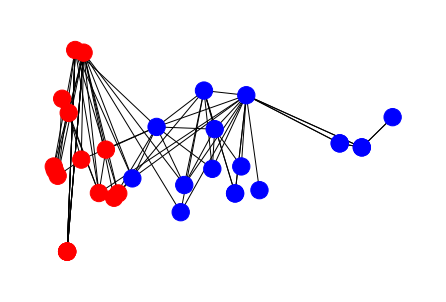

In [6]:
SVG(image)

**Metrics**

In [7]:
cosine_modularity(adjacency, embedding)

0.293795138937445

## Digraphs

In [11]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Embedding**

In [12]:
svd = SVD(3)
embedding = svd.fit_transform(adjacency)
embedding.shape

GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=True, solver=LanczosSVD())

In [ ]:
# skip first component
position = embedding[:,1:]

In [5]:
image = svg_digraph(adjacency, position, names=names)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


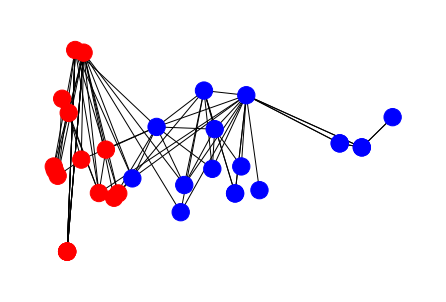

In [6]:
SVG(image)

**Metrics**

In [17]:
cosine_modularity(adjacency, embedding)

0.08971069826391698

## Bigraphs

**Loading**

In [18]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Embedding**

In [19]:
svd = SVD(3, normalized=False)
svd.fit(biadjacency)

GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=False, solver=LanczosSVD())

In [20]:
embedding_row = svd.embedding_row_
embedding_row.shape

(15, 3)

In [21]:
embedding_col = svd.embedding_col_
embedding_col.shape

(16, 3)

In [ ]:
# skip first component
position_row = embedding_row[:,1:]
position_col = embedding_col[:,1:]

In [22]:
image = svg_bigraph(biadjacency, names_row, names_col, 
                    position_row=embedding_row, position_col=embedding_col,
                    color_row='blue', color_col='red')

In [23]:
SVG(image)